In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy import stats
import itertools
import warnings
from sklearn.mixture import GaussianMixture
import graphviz



In [2]:
# Import demographics
demographics_url = f'https://raw.githubusercontent.com/vbtCogSci/features_of_agency/master/data/datasets/properties_1/datasets_csv/demographics.csv'
df_demo = pd.read_csv(demographics_url, sep=',').rename({'Unnamed: 0': 'part_id'}, axis=1)

# Import sanity checks
sanity_checks_url = f'https://raw.githubusercontent.com/vbtCogSci/features_of_agency/master/data/datasets/properties_1/datasets_csv/sanity_checks.csv'
sanity_checks_in = pd.read_csv(sanity_checks_url, sep=',').drop('Unnamed: 0', axis=1)

# Task data
df_task = f'https://raw.githubusercontent.com/vbtCogSci/features_of_agency/master/data/datasets/properties_1/datasets_csv/task_data.csv'
df_task = pd.read_csv(df_task).drop('Unnamed: 0', axis=1)

properties = df_task.columns[4:-4].to_list()
properties_agency = df_task.columns[4:-4].to_list() + ['agency']
properties_full = df_task.columns[4:].to_list()

X = df_task[properties_agency].to_numpy().T 
U_label = properties_agency



In [21]:
df_means = df_task[['word'] + properties].groupby('word').mean()#.sort_values('agency')

X = df_means.to_numpy()
labels = df_means.index.to_list()

df_means

,energy,complexity,movement,replication,communication,monitoring,reaction,variety,mistakes,learning
word,,,,,,,,,,
artificial_intelligence,75.9500,81.3000,31.4000,25.1125,72.3125,63.3625,63.4500,74.4750,68.4000,73.8875
autonomous_car,89.8375,87.5250,67.1375,2.5375,40.5500,45.9750,60.2625,54.1875,60.5875,45.9875
biological_virus,65.6500,55.9875,59.2375,85.9500,16.0875,21.8625,73.8875,36.6875,24.5375,37.0875
car,89.5125,88.1000,31.1000,4.1875,21.6000,17.8125,37.1125,39.1625,36.1250,8.2500
chicken,83.9625,74.1750,94.1750,91.3875,58.8625,40.0750,77.6250,54.0750,62.6625,50.5000
chimpanzee,87.1750,82.8875,94.0625,89.3125,82.0000,62.0750,88.7500,80.8250,81.1000,83.1250
computer,91.0000,88.8375,2.4375,6.5625,52.8250,46.0250,33.1000,82.4000,54.8125,48.2000
computer_virus,56.5125,57.6250,30.3500,72.0000,27.1875,25.2750,43.4250,45.6375,27.2500,30.4375
dolphin,87.6625,81.5875,94.8375,89.0000,80.1625,58.6625,84.4750,73.6375,72.7500,81.3750


BIC: -140.3756284119038
[0.2  0.2  0.2  0.1  0.15 0.15]

[[82.9    79.4219 10.7469 10.6469 61.5344 47.0562 45.5562 75.7156 58.1937
  53.4312]
 [87.5156 82.7937 93.9594 89.0937 78.6844 63.0094 85.3781 75.725  77.8937
  77.325 ]
 [69.775  56.5062 47.4406 78.6719 23.8062 24.8562 68.7469 36.9156 26.5812
  30.5562]
 [25.1437 21.4     2.7312  6.0937  3.3562  2.475  20.8625 20.0312  5.15
   2.3562]
 [87.     84.2042 65.825   6.5958 42.425  41.725  59.4    53.4417 57.475
  44.7875]
 [74.7917 67.9708 21.0125  3.6167 22.3958 15.1833 35.9167 26.775  29.2625
   6.9042]]



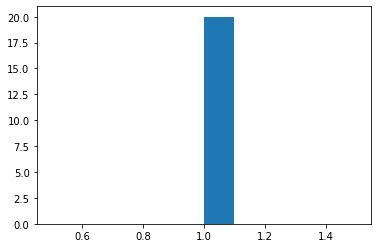

In [6]:
num_components = 6
cov = 'full'

gm = GaussianMixture(n_components=num_components, covariance_type=cov).fit(X)

print(f'BIC: {gm.bic(X)}')
print(np.round(gm.weights_, 4))
print()
print(np.round(gm.means_, 4))
print()

#for i in range(gm.covariances_.shape[0]):
#    print(np.round(np.diag(gm.covariances_[i, :, :])**(1/2), 4))

plt.hist(gm.predict_proba(X).max(axis=1))
plt.show()

In [9]:
a = gm.predict(X)

df_means['assignment'] = a

df_means.sort_values('assignment').astype(int)

,energy,complexity,movement,replication,communication,monitoring,reaction,variety,mistakes,learning,assignment
word,,,,,,,,,,,
artificial_intelligence,75,81,31,25,72,63,63,74,68,73,0
smartphone,86,84,5,5,46,36,36,78,46,36,0
computer,91,88,2,6,52,46,33,82,54,48,0
virtual_assistant,77,62,3,4,74,42,48,67,62,55,0
chicken,83,74,94,91,58,40,77,54,62,50,1
chimpanzee,87,82,94,89,82,62,88,80,81,83,1
dolphin,87,81,94,89,80,58,84,73,72,81,1
human,91,92,92,86,93,91,90,94,95,94,1
tree,77,60,14,70,16,17,81,21,8,11,2


In [17]:
for w in df_means.index:
    df_task.loc[df_task.word == w, 'cluster'] = df_means.loc[w, 'assignment']

In [18]:
df_task.to_csv('C:\\Users\\vbtes\\CompProjects\\vbtCogSci\\features_of_agency\\data\\datasets\\properties_1\\datasets_csv\\task_data.csv')

,part_id,word,reaction_time,slider_order,energy,complexity,movement,replication,communication,monitoring,reaction,variety,mistakes,learning,goal_setting,freewill,agency,goal_directedness,cluster
0,6503088.0,human,49350.0,1,95.0,97.0,97.0,96.0,97.0,99.0,99.0,100.0,98.0,97.0,98.0,99.0,98.0,97.0,1.0
1,6503088.0,rock,29951.0,1,12.0,18.0,2.0,38.0,3.0,4.0,20.0,11.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0
2,6503088.0,thermostat,27408.0,1,45.0,61.0,1.0,1.0,23.0,1.0,66.0,3.0,31.0,2.0,2.0,2.0,10.0,3.0,5.0
3,6503088.0,smartphone,33909.0,1,87.0,89.0,3.0,2.0,29.0,35.0,56.0,98.0,66.0,27.0,1.0,1.0,38.0,22.0,0.0
4,6503088.0,chicken,32955.0,1,81.0,77.0,100.0,98.0,64.0,33.0,50.0,66.0,56.0,91.0,18.0,60.0,45.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,7039589.0,autonomous_car,48111.4,8,93.0,84.0,71.0,4.0,15.0,52.0,67.0,44.0,90.0,55.0,47.0,28.0,62.0,55.0,4.0
1596,7039589.0,car,31217.2,8,93.0,75.0,9.0,2.0,6.0,5.0,4.0,39.0,22.0,5.0,5.0,5.0,81.0,3.0,5.0
1597,7039589.0,hammer,58117.7,8,13.0,6.0,4.0,4.0,3.0,5.0,15.0,3.0,4.0,0.0,4.0,5.0,4.0,3.0,3.0
1598,7039589.0,virtual_assistant,40232.0,8,54.0,35.0,3.0,5.0,89.0,56.0,55.0,91.0,80.0,77.0,70.0,11.0,64.0,73.0,0.0
